# Explorative analysis of the cost of healcare related to longevity

### 1. Import data "Years lived with disability v.s. Health expenditure per capita

The data is take from <a href="https://ourworldindata.org/life-expectancy#life-expectancy-and-healthy-life-expectancy">the study</a> in Our World in Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
global_data=pd.read_csv('years-lived-with-disability-vs-health-expenditure-per-capita.csv')

In [3]:
global_data.head(5)

,Entity,Code,Year,Years Lived With Disability (years),"Health expenditure per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder)
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1820,NaN,NaN,3280000.0
2,Afghanistan,AFG,1870,NaN,NaN,4207000.0
3,Afghanistan,AFG,1913,NaN,NaN,5730000.0
4,Afghanistan,AFG,1950,NaN,NaN,8151455.0


In [27]:
# Filter down the dataset focusing on 95-2014

healthcost_percapita_95to14=global_data.loc[(global_data['Year']>=1995) & (global_data['Year']<=2014)]

### 2. In order to see the weight of Healthcare expenditure per capita, import GDP per capita

In [5]:

gdp_per_capita=pd.read_csv("gdp-per-capita-.csv")
gdp_per_capita.head(5)

,Entity,Code,Year,Real GDP per capita in US$
0,Afghanistan,AFG,1950,2392
1,Afghanistan,AFG,1951,2422
2,Afghanistan,AFG,1952,2462
3,Afghanistan,AFG,1953,2568
4,Afghanistan,AFG,1954,2576


In [6]:
gdp_year95_14=gdp_per_capita.loc[(gdp_per_capita['Year']>=1995) & (gdp_per_capita['Year']<=2014)]
gdp_year95_14.shape

(3380, 4)

### 3. Concatination of the above tables

#### Create common column "CountryYear" in order to contacinate two tables

In [7]:
healthcost_percapita_95to14['CountryYear'] = healthcost_percapita_95to14["Code"]+healthcost_percapita_95to14["Year"].map(str)
healthcost_percapita_95to14.head(5)

/Users/NamiMacAir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Entity,Code,Year,Years Lived With Disability (years),"Health expenditure per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder),CountryYear
49,Afghanistan,AFG,1995,7.77,NaN,19789880.0,AFG1995
50,Afghanistan,AFG,1996,7.78,NaN,20684982.0,AFG1996
51,Afghanistan,AFG,1997,7.69,NaN,21299350.0,AFG1997
52,Afghanistan,AFG,1998,7.48,NaN,21752257.0,AFG1998
53,Afghanistan,AFG,1999,7.73,NaN,22227543.0,AFG1999


In [8]:
gdp_year95_14['CountryYear'] = gdp_year95_14["Code"]+gdp_year95_14["Year"].map(str)

/Users/NamiMacAir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
gdp_year95_14.head(5)

,Entity,Code,Year,Real GDP per capita in US$,CountryYear
45,Afghanistan,AFG,1995,1101,AFG1995
46,Afghanistan,AFG,1996,1008,AFG1996
47,Afghanistan,AFG,1997,926,AFG1997
48,Afghanistan,AFG,1998,856,AFG1998
49,Afghanistan,AFG,1999,787,AFG1999


In [10]:
healthcarecost=pd.merge(healthcost_percapita_95to14, gdp_year95_14, how='left', on='CountryYear')
healthcarecost.head(5)

,Entity_x,Code_x,Year_x,Years Lived With Disability (years),"Health expenditure per capita, PPP (constant 2011 international $) (constant 2011 international $)",Total population (Gapminder),CountryYear,Entity_y,Code_y,Year_y,Real GDP per capita in US$
0,Afghanistan,AFG,1995,7.77,NaN,19789880.0,AFG1995,Afghanistan,AFG,1995.0,1101.0
1,Afghanistan,AFG,1996,7.78,NaN,20684982.0,AFG1996,Afghanistan,AFG,1996.0,1008.0
2,Afghanistan,AFG,1997,7.69,NaN,21299350.0,AFG1997,Afghanistan,AFG,1997.0,926.0
3,Afghanistan,AFG,1998,7.48,NaN,21752257.0,AFG1998,Afghanistan,AFG,1998.0,856.0
4,Afghanistan,AFG,1999,7.73,NaN,22227543.0,AFG1999,Afghanistan,AFG,1999.0,787.0


In [11]:
healthcarecost.columns=['Country','Code','Year','YearsWithDisability','HealthcarecostPerCapita','Population','CountryYear','country2','code2','year2','GDPperCapitaUSD']
healthcarecost.head(5)

,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,CountryYear,country2,code2,year2,GDPperCapitaUSD
0,Afghanistan,AFG,1995,7.77,NaN,19789880.0,AFG1995,Afghanistan,AFG,1995.0,1101.0
1,Afghanistan,AFG,1996,7.78,NaN,20684982.0,AFG1996,Afghanistan,AFG,1996.0,1008.0
2,Afghanistan,AFG,1997,7.69,NaN,21299350.0,AFG1997,Afghanistan,AFG,1997.0,926.0
3,Afghanistan,AFG,1998,7.48,NaN,21752257.0,AFG1998,Afghanistan,AFG,1998.0,856.0
4,Afghanistan,AFG,1999,7.73,NaN,22227543.0,AFG1999,Afghanistan,AFG,1999.0,787.0


In [12]:
healthcarecost=healthcarecost[['CountryYear','Country','Code','Year','YearsWithDisability','HealthcarecostPerCapita','Population','GDPperCapitaUSD']]
healthcarecost.head(5)

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD
0,AFG1995,Afghanistan,AFG,1995,7.77,NaN,19789880.0,1101.0
1,AFG1996,Afghanistan,AFG,1996,7.78,NaN,20684982.0,1008.0
2,AFG1997,Afghanistan,AFG,1997,7.69,NaN,21299350.0,926.0
3,AFG1998,Afghanistan,AFG,1998,7.48,NaN,21752257.0,856.0
4,AFG1999,Afghanistan,AFG,1999,7.73,NaN,22227543.0,787.0


### 4. Create a new column showing Healthcare Cost per Capita devided by GDP per capita 
#### in order to see the Healthcare cost weight

In [13]:
healthcarecost['WeightofHealthcarecost'] = healthcarecost.apply(lambda row: (row.HealthcarecostPerCapita / row.GDPperCapitaUSD)*100, axis = 1) 

In [14]:
healthcarecost.head(10)

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
0,AFG1995,Afghanistan,AFG,1995,7.77,NaN,19789880.0,1101.0,NaN
1,AFG1996,Afghanistan,AFG,1996,7.78,NaN,20684982.0,1008.0,NaN
2,AFG1997,Afghanistan,AFG,1997,7.69,NaN,21299350.0,926.0,NaN
3,AFG1998,Afghanistan,AFG,1998,7.48,NaN,21752257.0,856.0,NaN
4,AFG1999,Afghanistan,AFG,1999,7.73,NaN,22227543.0,787.0,NaN
5,AFG2000,Afghanistan,AFG,2000,7.74,NaN,22856302.0,735.0,NaN
6,AFG2001,Afghanistan,AFG,2001,7.68,NaN,23677385.0,692.0,NaN
7,AFG2002,Afghanistan,AFG,2002,7.77,75.983514,24639841.0,1088.0,6.983779
8,AFG2003,Afghanistan,AFG,2003,7.85,89.440178,25678639.0,1112.0,8.043181
9,AFG2004,Afghanistan,AFG,2004,7.90,87.520903,26693486.0,1107.0,7.906134


In [15]:
healthcarecost.describe()

,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
count,63735.000000,29480.000000,39775.000000,4.239000e+03,62519.000000,39197.000000
mean,2004.494767,8.878243,832.931647,2.870884e+07,12509.337146,7.051318
std,5.763321,1.225515,1295.309015,1.187117e+08,5490.336300,11.444578
min,1995.000000,2.150000,5.943714,5.000000e+01,158.000000,0.170193
25%,1999.000000,7.920000,144.610450,4.424700e+05,9185.000000,1.265845
50%,2004.000000,8.800000,355.104242,4.911886e+06,11645.000000,3.096530
75%,2009.000000,10.010000,806.367812,1.706203e+07,14627.000000,6.595259
max,2014.000000,12.020000,9402.536971,1.359368e+09,155533.000000,122.624062


### 4. Subset the data of 2014 for all countries and visualise the Weight of Healthcare Cost 

In [16]:
#Subset the data of 2014
year2014=healthcarecost.loc[(healthcarecost['Year']==2014)]
year2014.head(5)

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
19,AFG2014,Afghanistan,AFG,2014,8.49,166.516727,NaN,2022.0,8.235249
39,ALB2014,Albania,ALB,2014,9.84,614.535946,NaN,9808.0,6.265660
59,DZA2014,Algeria,DZA,2014,11.34,932.100284,NaN,13744.0,6.781871
79,ASM2014,American Samoa,ASM,2014,9.71,NaN,NaN,NaN,NaN
99,AND2014,Andorra,AND,2014,11.34,4272.523818,NaN,NaN,NaN


In [17]:
year2014.describe()

,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
count,3161.0,1474.000000,1991.000000,0.0,3125.000000,1961.000000
mean,2014.0,9.353664,1271.467447,NaN,12626.053120,10.709828
std,0.0,1.116017,1745.820150,NaN,5680.391187,15.500106
min,2014.0,6.160000,24.956220,NaN,561.000000,0.491276
25%,2014.0,8.360000,233.468349,NaN,9185.000000,2.218232
50%,2014.0,9.305000,710.910707,NaN,11645.000000,6.005508
75%,2014.0,10.400000,1109.742605,NaN,14627.000000,10.213053
max,2014.0,11.970000,9402.536971,NaN,155069.000000,122.624062


In [18]:
year2014_modified=year2014[year2014.WeightofHealthcarecost.notnull()]
year2014_modified.head(5)

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
19,AFG2014,Afghanistan,AFG,2014,8.49,166.516727,NaN,2022.0,8.235249
39,ALB2014,Albania,ALB,2014,9.84,614.535946,NaN,9808.0,6.265660
59,DZA2014,Algeria,DZA,2014,11.34,932.100284,NaN,13744.0,6.781871
119,AGO2014,Angola,AGO,2014,8.21,239.010233,NaN,8673.0,2.755797
919,NaN,Arab World,NaN,2014,NaN,813.092212,NaN,8651.0,9.398823
920,NaN,Arab World,NaN,2014,NaN,813.092212,NaN,8404.0,9.675062
921,NaN,Arab World,NaN,2014,NaN,813.092212,NaN,8583.0,9.473287
922,NaN,Arab World,NaN,2014,NaN,813.092212,NaN,8394.0,9.686588
923,NaN,Arab World,NaN,2014,NaN,813.092212,NaN,8802.0,9.237585
924,NaN,Arab World,NaN,2014,NaN,813.092212,NaN,9583.0,8.484736


In [19]:
year2014_modified.drop_duplicates(subset='Country', keep='last', inplace=True)

/Users/NamiMacAir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
year2014_modified.describe()

,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
count,206.0,164.000000,206.000000,0.0,206.000000,206.000000
mean,2014.0,9.367927,1330.877502,NaN,17073.417476,7.491117
std,0.0,1.284920,1657.723694,NaN,17579.241583,6.413076
min,2014.0,6.160000,24.956220,NaN,561.000000,0.629084
25%,2014.0,8.360000,218.589491,NaN,5806.000000,4.544197
50%,2014.0,9.435000,720.714255,NaN,14627.000000,6.445184
75%,2014.0,10.482500,1664.265674,NaN,19712.250000,8.622728
max,2014.0,11.970000,9402.536971,NaN,155069.000000,61.014420


In [21]:
# Let's see the distrubution of Weight of Heathcare cost
import seaborn as sns

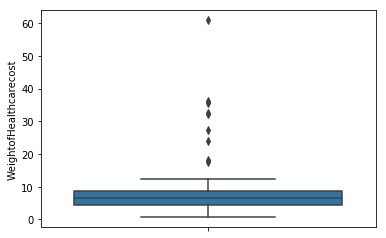

In [22]:
sns.boxplot(y=year2014_modified['WeightofHealthcarecost'])

In [30]:
#Now with Bubble plot to see the Relattionships wit the Years with disability and the Weight of Healthcare cost

import matplotlib.pyplot as plt

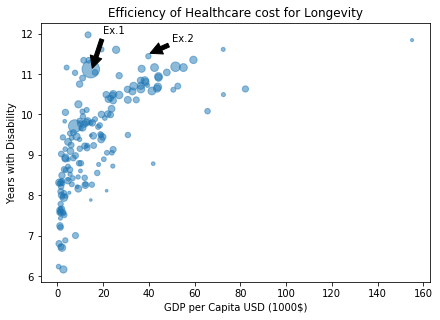

In [76]:
x=(year2014_modified['GDPperCapitaUSD']) /1000 #Devide the GDPperCapital by 1000 to shorten the X lim
y=year2014_modified['YearsWithDisability']
z=year2014_modified['WeightofHealthcarecost']

plt.axes([0, 6, 0.9, 0.9])
plt.scatter(x, y, s=z*5, alpha=0.5) #Multple the Weight of Healthcare Cost by 5 to make an emphasis of its magnitude
plt.xlabel('GDP per Capita USD (1000$)')
plt.ylabel('Years with Disability')
plt.title('Efficiency of Healthcare cost for Longevity')
plt.annotate(
    'Ex.1', xy=(15, 11.1) , xytext=(20, 12), 
    arrowprops=dict(facecolor='black', shrink=0.05)
)
plt.annotate(
    'Ex.2', xy=(40, 11.5) , xytext=(50, 11.8), 
    arrowprops=dict(facecolor='black', shrink=0.05)
)
plt.show()

What is interesting here is not about the curve which might fit in logistic regression but more about some exceptional examples:
<ol>
<li>
Ex.1 represents a country with extremely high Weight of Heahlthcare, among other peer countries with the same level of GDP per capita and the same lengh of years with disability.</li>
<li>
Ex.2 repsents a coutnry with relatively low Weight of Healthcare while maintaining the longer lengh of years with disability among peer countries with the same level of GDP per capita
    </li>
 </ol>

Those examples might worth closer examination.

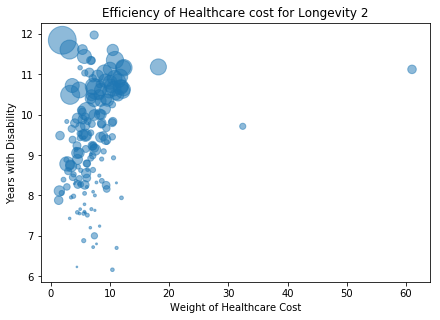

In [77]:
x=year2014_modified['WeightofHealthcarecost']  #Devide the GDPperCapital by 1000 to shorten the X lim
y=year2014_modified['YearsWithDisability']
z=(year2014_modified['GDPperCapitaUSD'])/1000 

plt.axes([0, 6, 0.9, 0.9])
plt.scatter(x, y, s=z*5, alpha=0.5)
plt.xlabel('Weight of Healthcare Cost')
plt.ylabel('Years with Disability')
plt.title('Efficiency of Healthcare cost for Longevity 2')
plt.show()

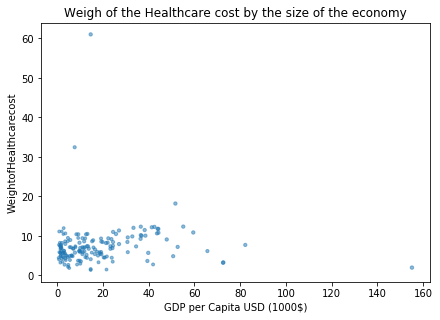

In [84]:
x=(year2014_modified['GDPperCapitaUSD'])/1000   #Devide the GDPperCapital by 1000 to shorten the X lim
y=year2014_modified['WeightofHealthcarecost']
z=year2014_modified['YearsWithDisability']

plt.axes([0, 6, 0.9, 0.9])
plt.scatter(x, y, s=z, alpha=0.5)
plt.xlabel('GDP per Capita USD (1000$)')
plt.ylabel('WeightofHealthcarecost')
plt.title('Weigh of the Healthcare cost by the size of the economy')
plt.show()

From the above 2 plots, it can be observed that the most countries' weight of Healthcare is between 1-12%, regardless the size of the economy. 
However, there are some countries demonstrating higher or lower weight of Healthcase cost, among other peer countries with the same economic scale. 

In [95]:
#To distil the example of countries showing higher or lower weight of Healthcare cost.
year2014_modified.sort_values('WeightofHealthcarecost', ascending=False).head()

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
44595,NaN,North America,NaN,2014,11.12,8924.579264,NaN,14627.0,61.014420
49679,NaN,Post-demographic dividend,NaN,2014,NaN,5285.059040,NaN,14627.0,36.132215
23341,NaN,High income,NaN,2014,NaN,5204.815251,NaN,14627.0,35.583614
8212,CUB2014,Cuba,CUB,2014,9.71,2474.616779,NaN,7628.0,32.441227
46255,NaN,OECD members,NaN,2014,NaN,4701.016850,NaN,14627.0,32.139310


There are some data with a group of countries rather than a actual countries, so those need to be separated out.

### 2. Second attempt of Exploration with further distilled dataset

In [100]:
year2014_categories=year2014_modified[year2014_modified.Code.isnull()]
year2014_categories.sort_values('WeightofHealthcarecost', ascending=False).head()

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
44595,NaN,North America,NaN,2014,11.12,8924.579264,NaN,14627.0,61.014420
49679,NaN,Post-demographic dividend,NaN,2014,NaN,5285.059040,NaN,14627.0,36.132215
23341,NaN,High income,NaN,2014,NaN,5204.815251,NaN,14627.0,35.583614
46255,NaN,OECD members,NaN,2014,NaN,4701.016850,NaN,14627.0,32.139310
15692,NaN,Euro area,NaN,2014,NaN,4006.680006,NaN,14627.0,27.392357


In [101]:
year2014_countries=year2014_modified[year2014_modified.Code.notnull()]
year2014_countries.sort_values('WeightofHealthcarecost', ascending=False).head(10)

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
8212,CUB2014,Cuba,CUB,2014,9.71,2474.616779,NaN,7628.0,32.441227
59535,USA2014,United States,USA,2014,11.18,9402.536971,NaN,51664.0,18.199398
38332,LUX2014,Luxembourg,LUX,2014,11.16,6812.080348,NaN,55102.0,12.362673
20571,FRA2014,France,FRA,2014,10.63,4508.134566,NaN,36527.0,12.341924
59117,SWE2014,Sweden,SWE,2014,11.16,5218.860734,NaN,42476.0,12.286611
1857,AUT2014,Austria,AUT,2014,10.58,5038.881645,NaN,41338.0,12.189466
42907,NZL2014,New Zealand,NZL,2014,10.70,4018.307819,NaN,33339.0,12.052874
8312,DJI2014,Djibouti,DJI,2014,7.94,337.958861,NaN,2823.0,11.971621
20689,DEU2014,Germany,DEU,2014,10.68,5182.114049,NaN,43922.0,11.798447
42868,NLD2014,Netherlands,NLD,2014,10.94,5201.696377,NaN,44205.0,11.767213


Cuba and Djibouti are some interesting cases, spending as much on the healthcare as the countries with much bigger economies.

In [105]:
# Let's have a look at countries with lowest weight of healthcare cost
year2014_countries.sort_values('WeightofHealthcarecost').head(10)

,CountryYear,Country,Code,Year,YearsWithDisability,HealthcarecostPerCapita,Population,GDPperCapitaUSD,WeightofHealthcarecost
59396,TKM2014,Turkmenistan,TKM,2014,8.11,319.898660,NaN,21546.0,1.484724
29373,LAO2014,Laos,LAO,2014,8.06,98.467782,NaN,5251.0,1.875220
50519,QAT2014,Qatar,QAT,2014,11.84,3071.187757,NaN,155069.0,1.980530
42788,MMR2014,Myanmar,MMR,2014,8.39,103.466134,NaN,4728.0,2.188370
48695,PAK2014,Pakistan,PAK,2014,8.88,128.988725,NaN,4850.0,2.659561
1937,BGD2014,Bangladesh,BGD,2014,9.83,88.075857,NaN,3217.0,2.737826
119,AGO2014,Angola,AGO,2014,8.21,239.010233,NaN,8673.0,2.755797
14832,GNQ2014,Equatorial Guinea,GNQ,2014,8.78,1163.416147,NaN,41907.0,2.776186
29060,IDN2014,Indonesia,IDN,2014,8.60,299.405139,NaN,10090.0,2.967345
29333,KWT2014,Kuwait,KWT,2014,11.61,2319.604650,NaN,72508.0,3.199102
